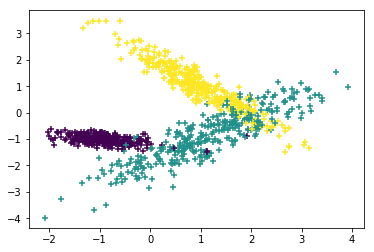

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification
%matplotlib inline

X,y = make_classification(n_samples=1000,n_features=2,n_classes=3,
                          n_redundant=0,n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],c=y,marker='+')
plt.show()

In [10]:
from sklearn import neighbors

# algorithm 可以选brute,kd_tree,ball_tree,auto
clf = neighbors.KNeighborsClassifier(algorithm='kd_tree',n_neighbors=10,
                                     weights='distance')
clf.fit(X,y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 确定训练集的边界
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

# 生成随机数据做预测
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

Text(0.5,1,"3-class classification (k=15,weights='distance')")

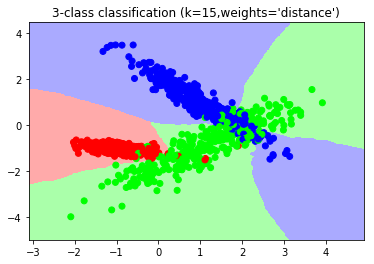

In [12]:
# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("3-class classification (k=15,weights='distance')")